In [ ]:
def api_runner():
    global df
    from requests import Request, Session
    from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
    import json
    import pandas as pd
    import os

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'10',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': ***,
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    #Normalize semi-structured JSON data into a flat table
    df = pd.json_normalize(data['data'])
    df['timestampt'] = pd.to_datetime('now')
    #if you want to create a csv and append data to it
    #os.path.isfile() method in Python is used to check whether the specified path is an existing regular file or not.
    if not os.path.isfile(r'C:\Users\LENOVO\OneDrive\Masaüstü\masaüstü\DATA.csv'):
        df.to_csv(r'C:\Users\LENOVO\OneDrive\Masaüstü\masaüstü\DATA.csv', header=True)
    else:
        df.to_csv(r'C:\Users\LENOVO\OneDrive\Masaüstü\masaüstü\DATA.csv', mode='a', header=False)
        df.reset_index()
        

In [ ]:
from time import time
from time import sleep
# you can use this api 333 times in a day
for i in range(333):
    api_runner()
    print('API runner completed')
    sleep(60)#wait for 60 seconds
exit()

In [171]:
# read csv and create pandas data frame
import pandas as pd
df = pd.read_csv(r'C:\Users\LENOVO\OneDrive\Masaüstü\masaüstü\DATA.csv')

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [170]:
df.head()

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestampt
0,0,1,Bitcoin,BTC,bitcoin,9976,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00,19287912.00,...,41.38,455313762555.54,NaN,2023-02-11T19:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-11 19:07:11.744002
1,1,1027,Ethereum,ETH,ethereum,6448,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,122373866.22,...,18.36,185532186937.95,NaN,2023-02-11T19:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-11 19:07:11.744002
2,2,825,Tether,USDT,tether,47413,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,68319442037.68,...,6.76,73149290801.49,NaN,2023-02-11T19:05:00.000Z,1027.00,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-02-11 19:07:11.744002
3,3,1839,BNB,BNB,bnb,1185,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",200000000.00,157899197.52,...,4.81,61596692879.82,NaN,2023-02-11T19:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-11 19:07:11.744002
4,4,3408,USD Coin,USDC,usd-coin,10023,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,41300980450.06,...,4.09,41303911232.15,NaN,2023-02-11T19:05:00.000Z,1027.00,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-02-11 19:07:11.744002


In [ ]:
# Pick columns you need and create a new data frame
df2 = df[['name','quote.USD.price',
       'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.last_updated', 'timestampt']]

In [173]:
# group date by cryptocurrency
df2 = df2.groupby('name', sort=False)[['quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d']].mean()
df2['name'] = df2.index
df2.reset_index(drop=True, inplace=True)
df2=df2.rename(columns={'quote.USD.percent_change_1h':'1h',
       'quote.USD.percent_change_24h':'24h', 'quote.USD.percent_change_7d':'7d',
       'quote.USD.percent_change_30d':'30d'})
df2

,1h,24h,7d,30d,name
0,-0.16,-0.15,-7.55,15.37,Bitcoin
1,-0.19,-0.73,-9.66,6.70,Ethereum
2,-0.00,-0.01,-0.00,0.01,Tether
3,-0.03,0.27,-6.97,7.61,BNB
4,-0.01,-0.01,0.00,-0.01,USD Coin
5,-0.18,-0.34,-8.03,1.53,XRP
6,-0.01,-0.00,-0.01,-0.03,Binance USD
7,0.01,-0.10,-10.59,9.65,Cardano
8,-0.18,-0.46,-16.49,1.99,Dogecoin
9,-0.61,-3.66,-3.71,35.43,Polygon


[]


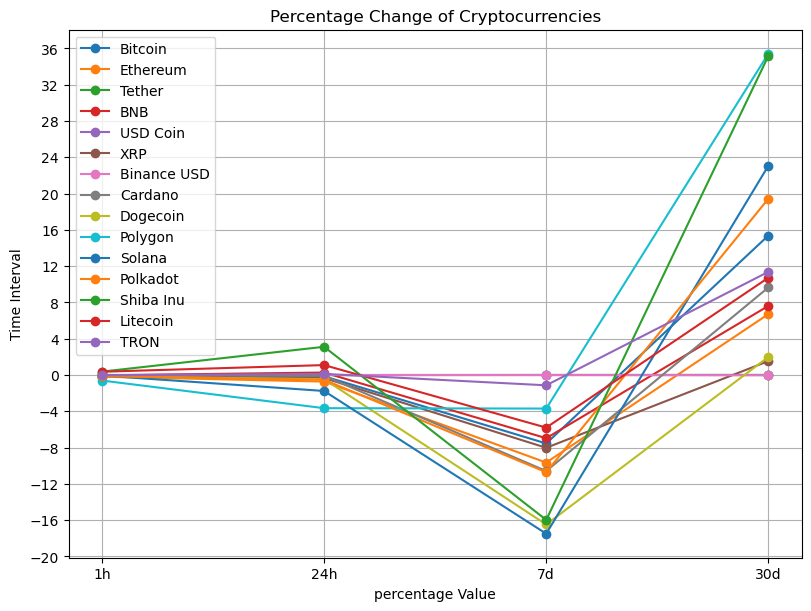

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# iterate time interval values and rows and get values for each one
x = df2.columns[0:-1]
y=[]
fig, ax = plt.subplots(figsize=(8,6), layout='constrained')
for j in range(0,10):

    for i in range(len(x)):
            y.append(df3._get_value(j, x[i]))
    
    ax.plot(x, y , label=df3.name.unique()[j], marker='o')  # Plot some data on the axes.
    ax.set_xlabel('percentage Value')  # Add an x-label to the axes.
    ax.set_ylabel('Time Interval')  # Add a y-label to the axes.
    ax.set_title("Percentage Change of Cryptocurrencies")  # Add a title to the axes.
    ax.set_yticks(np.arange(-20, 40, 4, dtype=int))
    ax.legend()
    plt.grid()
    y=[]
